In [1]:
# Assignment 1

## Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_dataset(filename: str):
    data = np.loadtxt(filename)
    print(f"Loaded {len(data)} samples from {filename}")
    return data

In [4]:
Xtrain = load_dataset("Xtrain.csv")
Xtest = load_dataset("Xtest.csv")
Ytrain = load_dataset("Ytrain.csv")

Loaded 3000 samples from Xtrain.csv
Loaded 3000 samples from Xtest.csv
Loaded 3000 samples from Ytrain.csv


Text(0, 0.5, 'Number of samples')

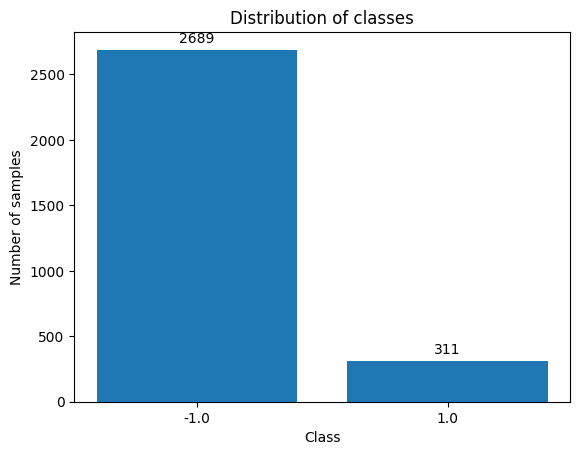

In [5]:
training_classes_counts = np.unique(Ytrain, return_counts=True)
fig, ax = plt.subplots()
bars = ax.bar(
    list(map(str, training_classes_counts[0])), training_classes_counts[1]
)
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f"{height}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )
plt.title("Distribution of classes")
plt.xlabel("Class")
plt.ylabel("Number of samples")

i.

a. There are 3000 examples in the training set and 3000 in the test set.

b. The training data has 2689 negative examples and 311 positive examples. There are almost 9 times as many negative examples as positive ones. This unbalanced dataset means that our classifier may not be as good at identifying features of the positive class. This can be rectified in training by oversampling the positive examples so that our classifier doesn't get biased to predicting the negative majority class (if this distribution is not representative of a real world distribution).

In [19]:
def show_random_samples(dataset, title, labels=None):
    random_samples_count = 10
    random_samples_indices = np.random.choice(
        len(Xtrain), size=random_samples_count, replace=False
    )
    random_samples = dataset[random_samples_indices]
    if labels is not None:
        random_samples_labels = labels[random_samples_indices]
    random_samples = np.reshape(random_samples, (random_samples_count, 28, 28))
    fig, axs = plt.subplots(2, 5)
    fig.set_figwidth(10)
    for i, sample in enumerate(random_samples):
        axs.flat[i].matshow(sample)
        if labels is not None:
            axs.flat[i].set_title(str(random_samples_labels[i]))
    fig.suptitle(title, size=14)
    fig.tight_layout()

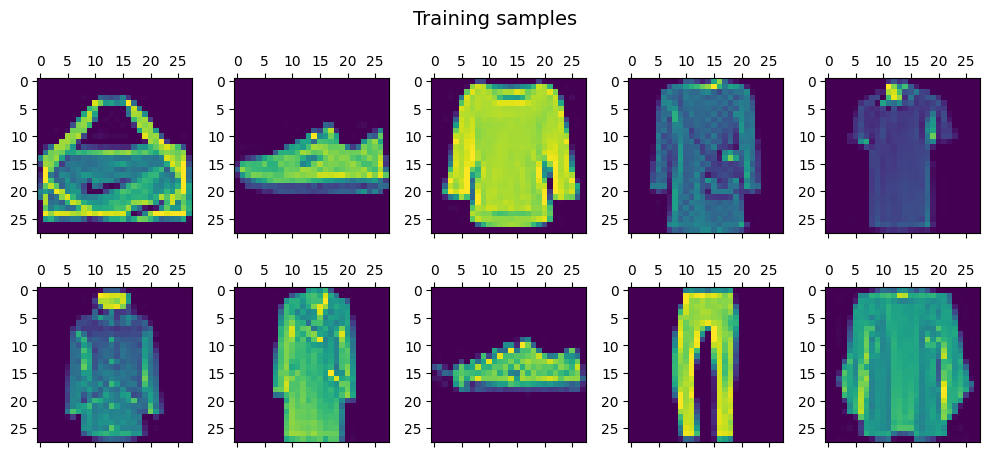

In [18]:
show_random_samples(Xtrain, "Training samples")

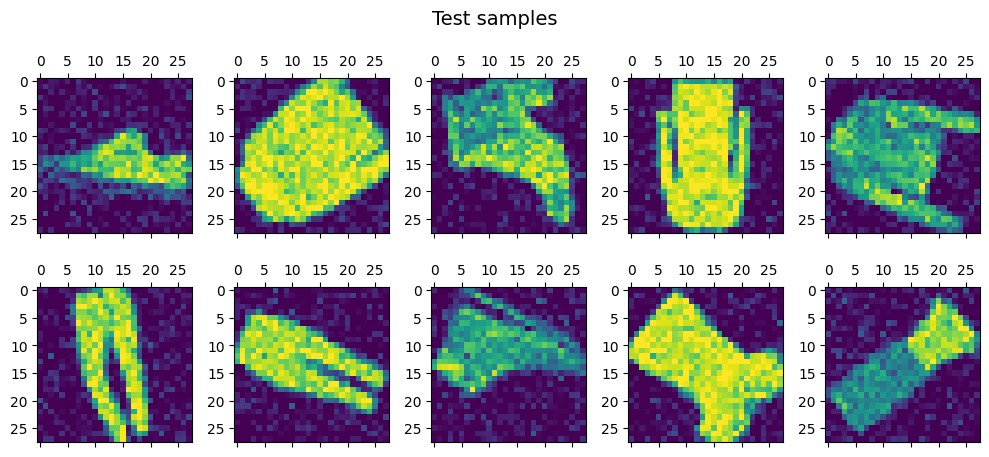

In [8]:
show_random_samples(Xtest, "Test samples")

ii.

a.

The samples look like items of clothing. They are all the right orientation, high contrast and well positioned.

b.

The test set samples are noisy and have random orientations. These will both pose problems for the classifier. The noise means the features are less defined, and the different orientations present different features entirely.

iii.

The F1 score combines precision and recall into a single metric and is useful when there is an uneven class distribution. It gives equal weight to both precision and recall and is particularly effective for binary classification tasks with imbalanced class distributions - as is our case here. Notably the AUC-ROC would be a poor choice since our number of negative classes is so high.

iv.

Since there are only two labels, the classifier would choose them with equal 0.5 probability. so given any sample $x$ with a label $y$ and predicted label $\hat y$, it holds that $\mathbb{P}(\hat y = y) = \mathbb{P}(y = 1)\mathbb{P}(\hat y = 1) + \mathbb{P}(y = -1) \mathbb{P}(\hat y = -1) = 0.5(\mathbb{P}(y = 1)+\mathbb{P}(y = -1)) = 0.5$. So, given any distribution of classes, a random classifier would have an accuracy of $0.5$.

v.

Suppose our classifier choses a positive outcome with probability $p$. Then our FPR will be $p$ and our TPR will also be $p$ so our ROC curve will be a straight line from (0,0) to (1,1) giving an AUC-ROC of 0.5.

Suppose the proportion of positive samples is $k_P$. The precision for such a classifier would be $\frac{p k_P}{p}=k_P$ so the precision is constant and gives a horizontal PR curve at $k_P$. This gives an AUC-PR of $k_P$

## Question 2

i.

Accuracy is the ratio of correctly classified samples.

Balanced accuracy is the mean of the true positive rate and the true negative rate (this accounts or an imbalanced training set).

AUC-ROC is the Area Under the Receiver Operating Characteristic Curve. The ROCC is the plot of True positive rate vs False positive rate.

AUC-PR is the Area Under the Precision-Recall Curve. The PR curve is the plot of Precision vs recall (or true positive rate)

F1 score is the harmonic mean of precision and recall. Precision is the proportion of true positive predictions to the total positive predictions.

MCC is a measure of correlation of the predicted classes and true classes.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    average_precision_score,
    f1_score,
    matthews_corrcoef,
    roc_curve,
    precision_recall_curve,
)
import pandas as pd
from timeit import default_timer as timer

splits = 5
n_neighbors = 5


def plot_roc_pr_curves(
    Xtrain, Ytrain, Xval, Yval, classifier_cls, classifier_kwargs, title
):
    classifier = classifier_cls(**classifier_kwargs)
    classifier.fit(Xtrain, Ytrain)

    z = classifier.predict_proba(Xval)[:, 1]
    fpr, tpr, thresholds = roc_curve(Yval, z)
    precision, recall, thresholds = precision_recall_curve(Yval, z)

    fig, ax = plt.subplots(2, 2)
    ax[0, 1].plot(fpr, tpr, "o-")
    ax[0, 1].set_title("ROC curve - validation set")
    ax[0, 1].set_xlabel("False positive rate")
    ax[0, 1].set_ylabel("True positive rate")
    ax[0, 1].grid(True)
    ax[1, 1].plot(recall, precision, "o-")
    ax[1, 1].set_title("Precision-Recall curve - validation set")
    ax[1, 1].set_xlabel("Recall")
    ax[1, 1].set_ylabel("Precision")
    ax[1, 1].grid(True)

    z = classifier.predict_proba(Xtrain)[:, 1]
    fpr, tpr, thresholds = roc_curve(Ytrain, z)
    precision, recall, thresholds = precision_recall_curve(Ytrain, z)
    ax[0, 0].plot(fpr, tpr, "o-")
    ax[0, 0].set_title("ROC curve - training set")
    ax[0, 0].set_xlabel("False positive rate")
    ax[0, 0].set_ylabel("True positive rate")
    ax[0, 0].grid(True)
    ax[1, 0].plot(recall, precision, "o-")
    ax[1, 0].set_title("Precision-Recall curve - training set")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].grid(True)
    fig.suptitle(title, size=14)
    fig.tight_layout()
    plt.show()


def perform_cross_validation(
    Xtrain,
    Ytrain,
    classifier_cls,
    classifier_kwargs,
    title,
    splits=splits,
    plot_graph=True,
    silent=False,
):
    stats_df = pd.DataFrame(columns=["metric", "mean", "std"])
    stats_df["metric"] = [
        "Accuracy",
        "Balanced accuracy",
        "AUC ROC",
        "AUC PR",
        "F1",
        "MCC",
        "Time Taken",
    ]

    metrics = []

    skf = StratifiedKFold(n_splits=splits)
    folds = list(skf.split(Xtrain, Ytrain))
    for i, (train_index, val_index) in enumerate(folds):
        Xtrain_split = Xtrain[train_index]
        Xval_split = Xtrain[val_index]
        Ytrain_split = Ytrain[train_index]
        Yval_split = Ytrain[val_index]
        classifier = classifier_cls(**classifier_kwargs)

        time_start = timer()
        classifier.fit(Xtrain_split, Ytrain_split)
        time_taken = timer() - time_start

        z = classifier.predict_proba(Xval_split)[:, 1]
        Yval_pred = classifier.predict(Xval_split)

        accuracy = accuracy_score(Yval_split, Yval_pred)
        bal_accuracy = balanced_accuracy_score(Yval_split, Yval_pred)
        auc_roc = roc_auc_score(Yval_split, z)
        auc_pr = average_precision_score(Yval_split, z)
        F1 = f1_score(Yval_split, Yval_pred)
        matthews_cc = matthews_corrcoef(Yval_split, Yval_pred)

        metrics.append(
            [
                accuracy,
                bal_accuracy,
                auc_roc,
                auc_pr,
                F1,
                matthews_cc,
                time_taken,
            ]
        )

    metrics = np.array(metrics)
    metrics_mean = np.mean(metrics, axis=0)
    metrics_std = np.std(metrics, axis=0)
    stats_df["mean"] = metrics_mean
    stats_df["std"] = metrics_std

    if not silent:
        print(f"{title} - Validation set statistics")
        print(stats_df)

        if plot_graph:
            train_index, val_index = folds[0]

            X_fold_train = Xtrain[train_index]
            Y_fold_train = Ytrain[train_index]

            plot_roc_pr_curves(
                X_fold_train,
                Y_fold_train,
                Xtrain[val_index],
                Ytrain[val_index],
                classifier_cls,
                classifier_kwargs,
                title,
            )

    return stats_df

KNN cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.909667  0.004643
1  Balanced accuracy  0.705068  0.010686
2            AUC ROC  0.853818  0.020051
3             AUC PR  0.490948  0.038623
4                 F1  0.506219  0.011249
5                MCC  0.463826  0.012757
6         Time Taken  0.002107  0.000271


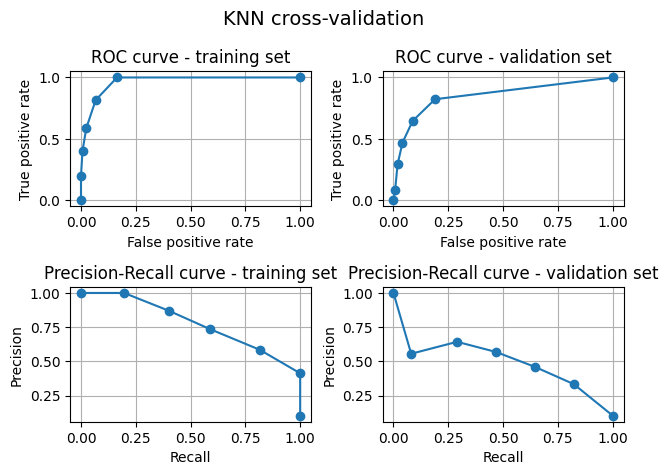

In [41]:
stats_df = perform_cross_validation(
    Xtrain,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation",
)

ii.

The ROC curve is most informative at a low false positive rate. Having a high true positive rate here means we have a skilled classifier. However having a low proportion of positive classes makes the ROC curve less useful.

iii.

KNN cross-validation with MinMaxScaler - Validation set statistics
              metric      mean       std
0           Accuracy  0.910333  0.005312
1  Balanced accuracy  0.708293  0.008480
2            AUC ROC  0.854270  0.019951
3             AUC PR  0.492061  0.041535
4                 F1  0.511955  0.012758
5                MCC  0.469372  0.017456
6         Time Taken  0.002130  0.000250


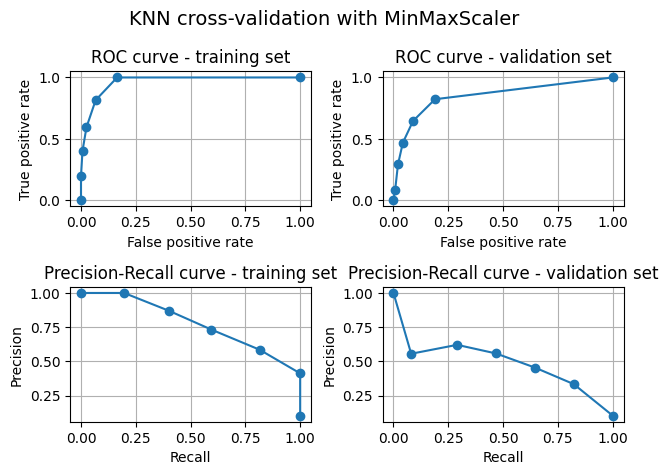

KNN cross-validation with StandardScaler - Validation set statistics
              metric      mean       std
0           Accuracy  0.911333  0.010562
1  Balanced accuracy  0.718890  0.020639
2            AUC ROC  0.865129  0.020786
3             AUC PR  0.513670  0.059425
4                 F1  0.527564  0.042577
5                MCC  0.483935  0.050392
6         Time Taken  0.001974  0.000218


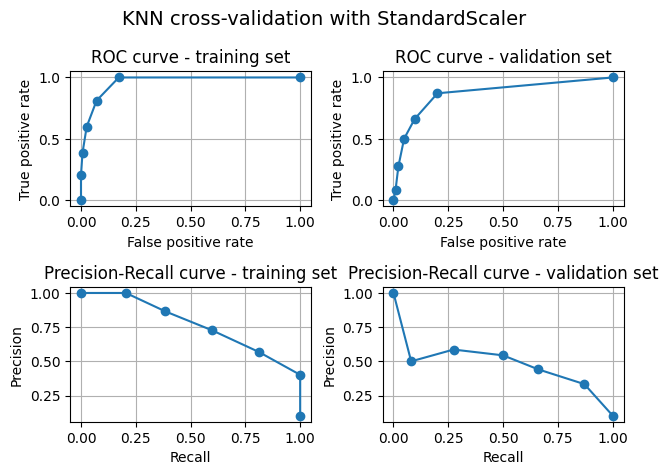

KNN cross-validation with random rotations - Validation set statistics
              metric      mean       std
0           Accuracy  0.892333  0.010625
1  Balanced accuracy  0.655521  0.020072
2            AUC ROC  0.821327  0.016293
3             AUC PR  0.372199  0.046526
4                 F1  0.407712  0.041958
5                MCC  0.355717  0.049403
6         Time Taken  0.001965  0.000172


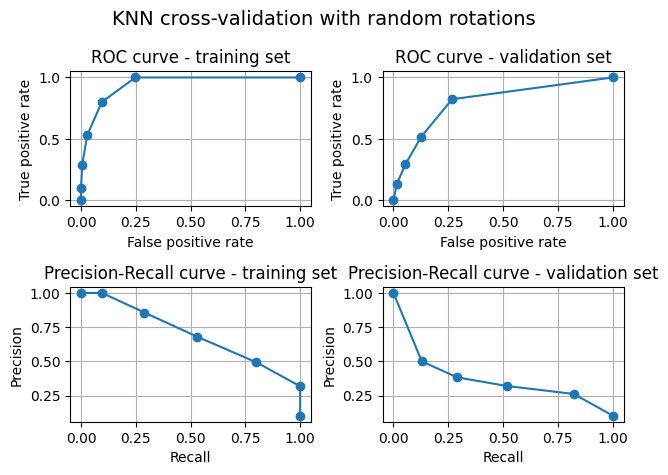

Preprocessing technique comparison
              metric   initial   min_max  standard  random_rotations
0           Accuracy  0.909667  0.910333  0.911333          0.892333
1  Balanced accuracy  0.705068  0.708293  0.718890          0.655521
2            AUC ROC  0.853818  0.854270  0.865129          0.821327
3             AUC PR  0.490948  0.492061  0.513670          0.372199
4                 F1  0.506219  0.511955  0.527564          0.407712
5                MCC  0.463826  0.469372  0.483935          0.355717
6         Time Taken  0.002061  0.002130  0.001974          0.001965
Ratios
              metric   min_max  standard  random_rotations
0           Accuracy  1.000733  1.001832          0.980945
1  Balanced accuracy  1.004575  1.019604          0.929728
2            AUC ROC  1.000529  1.013248          0.961947
3             AUC PR  1.002267  1.046282          0.758124
4                 F1  1.011331  1.042165          0.805405
5                MCC  1.011958  1.043355          0.

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
Xtrain_preprocessed = min_max_scaler.fit_transform(Xtrain)

min_max_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation with MinMaxScaler",
)

standard_scaler = StandardScaler()
Xtrain_preprocessed = standard_scaler.fit_transform(Xtrain)

standard_scale_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation with StandardScaler",
)


def random_rotations(dataset):
    dataset = np.reshape(dataset, (dataset.shape[0], 28, 28))
    dataset = np.array(
        [np.rot90(sample, np.random.randint(0, 4)) for sample in dataset]
    )
    dataset = np.reshape(dataset, (dataset.shape[0], 28 * 28))
    return dataset


Xtrain_preprocessed = random_rotations(Xtrain)

random_rotations_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    {"n_neighbors": n_neighbors},
    "KNN cross-validation with random rotations",
)

mean_compare = pd.DataFrame(
    columns=["metric", "initial", "min_max", "standard", "random_rotations"]
)
mean_compare["metric"] = stats_df["metric"]
mean_compare["initial"] = stats_df["mean"]
mean_compare["min_max"] = min_max_stats["mean"]
mean_compare["standard"] = standard_scale_stats["mean"]
mean_compare["random_rotations"] = random_rotations_stats["mean"]

print("Preprocessing technique comparison")
print(mean_compare)

ratios = mean_compare.copy()
ratios["min_max"] = mean_compare["min_max"] / mean_compare["initial"]
ratios["standard"] = mean_compare["standard"] / mean_compare["initial"]
ratios["random_rotations"] = (
    mean_compare["random_rotations"] / mean_compare["initial"]
)
ratios.drop(columns="initial", inplace=True)
print("Ratios")
print(ratios)

There is some improvement to the validation performance of our classifier when using preprocessing methods such as min-max scaling and standard scaling. The best performance was attained with the standard scaler, giving better results on all of our metrics, most notably the F1 score (4.2%) and AUC-PR (4.6%) which were mentioned earlier as good measures of performance on our dataset. Min-max Scaling our data also speeds up our code, taking 96% of the initial time (not accounting for preprocessing time).

Normalisation and standardisation can help a kNN classifier because it operates based on distances between data points. Normalising the data ensures that all features contribute equally to the distance computation.

## Question 3

We will look at using SVMs with linear, polynomial and RBF kernels, and Random forest classifiers. We will look first at optimising the hyperparameters with a gridsearch, optimising the F1 score. We also look at the KNN classifier hyperparameters.

In [69]:
from sklearn.model_selection import GridSearchCV

Xtrain_preprocessed = StandardScaler().fit_transform(Xtrain)

random_forest_grid = {
    "max_depth": [10, 40, 80, None],
    "n_estimators": [10, 40, 80, 160],
}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf, param_grid=random_forest_grid, cv=3, n_jobs=-1, verbose=1, scoring="f1"
)
rf_grid_search.fit(Xtrain_preprocessed, Ytrain)
best_rf_params = rf_grid_search.best_params_
print(best_rf_params)

svm_grid = {"C": [1, 10, 100, 1000], "kernel": ["rbf", "linear", "poly"]}
svm = SVC(random_state=42)
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_grid, cv=3, n_jobs=-1, verbose=1, scoring="f1")
svm_grid_search.fit(Xtrain_preprocessed, Ytrain)
best_svm_params = svm_grid_search.best_params_
print(best_svm_params)

knn_grid = {"n_neighbors": [3, 5, 7, 9, 11, 13]}
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_grid, cv=3, n_jobs=-1, verbose=1, scoring="f1")
knn_grid_search.fit(Xtrain_preprocessed, Ytrain)
best_knn_params = knn_grid_search.best_params_
print(best_knn_params)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 40, 'n_estimators': 40}
Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 100, 'kernel': 'rbf'}
Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'n_neighbors': 9}


In [71]:
rf_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    RandomForestClassifier,
    best_rf_params,
    "Random Forest cross-validation",
    plot_graph=False,
)
svm_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    SVC,
    best_svm_params | {"probability": True},
    "Support Vector Machine cross-validation",
    plot_graph=False,
)
knn_stats = perform_cross_validation(
    Xtrain_preprocessed,
    Ytrain,
    KNeighborsClassifier,
    best_knn_params,
    "KNN cross-validation",
    plot_graph=False,
)

Random Forest cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.923333  0.004595
1  Balanced accuracy  0.651640  0.020716
2            AUC ROC  0.927682  0.010885
3             AUC PR  0.650584  0.046659
4                 F1  0.453586  0.046018
5                MCC  0.489830  0.038142
6         Time Taken  0.631608  0.019814
Support Vector Machine cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.934333  0.006289
1  Balanced accuracy  0.771678  0.039657
2            AUC ROC  0.928582  0.016894
3             AUC PR  0.735784  0.030202
4                 F1  0.637932  0.057789
5                MCC  0.611205  0.051407
6         Time Taken  3.219505  0.161233
KNN cross-validation - Validation set statistics
              metric      mean       std
0           Accuracy  0.911333  0.007180
1  Balanced accuracy  0.715936  0.008746
2            AUC ROC  0.879756  0.024021
3   

The best model of the ones considered here is the SVM with RBF basis and $C = 100$. This model achieves an F1 score of $0.638$.

In [74]:
classifier_comparison = pd.DataFrame(columns=["metric", "Random Forest", "SVM", "KNN"])
classifier_comparison["metric"] = knn_stats["metric"]
classifier_comparison["Random Forest"] = rf_stats["mean"]
classifier_comparison["SVM"] = svm_stats["mean"]
classifier_comparison["KNN"] = knn_stats["mean"]
print("Comparing classifiers with best parameters")
print(classifier_comparison)

Comparing classifiers with best parameters
              metric  Random Forest       SVM       KNN
0           Accuracy       0.923333  0.934333  0.911333
1  Balanced accuracy       0.651640  0.771678  0.715936
2            AUC ROC       0.927682  0.928582  0.879756
3             AUC PR       0.650584  0.735784  0.530817
4                 F1       0.453586  0.637932  0.523874
5                MCC       0.489830  0.611205  0.480638
6         Time Taken       0.631608  3.219505  0.001691


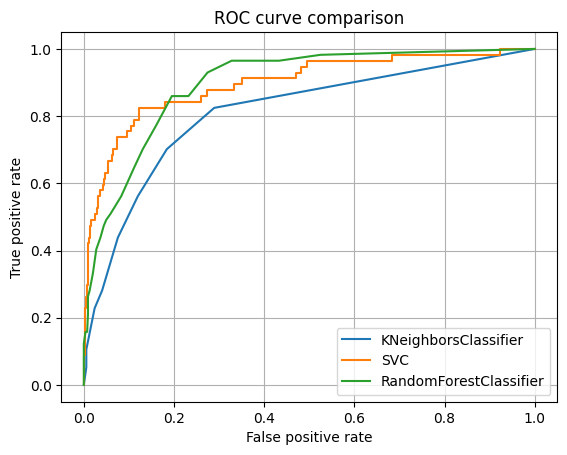

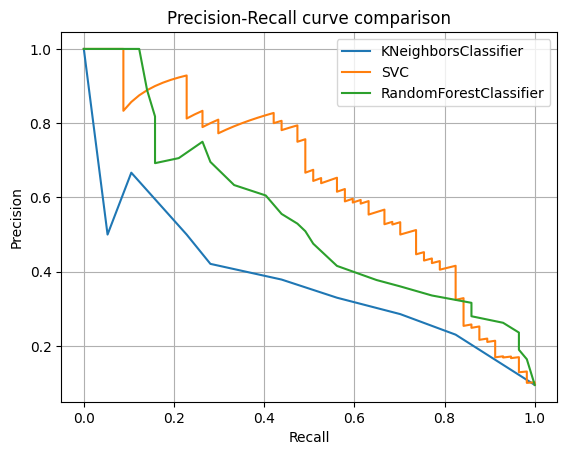

In [79]:
from sklearn.model_selection import train_test_split

# Assuming you have X and Y as your feature and target variables
Xtrain_cv, Xval_cv, Ytrain_cv, Yval_cv = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(**best_knn_params)
svm = SVC(**best_svm_params, probability=True)
rf = RandomForestClassifier(**best_rf_params)

fig, ax = plt.subplots()
for classifier in [knn, svm, rf]:
    classifier.fit(Xtrain_cv, Ytrain_cv)
    
for classifier in [knn, svm, rf]:
    z = classifier.predict_proba(Xval_cv)[:, 1]
    fpr, tpr, thresholds = roc_curve(Yval_cv, z)
    ax.plot(fpr, tpr, label=classifier.__class__.__name__)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC curve comparison")
ax.legend()
ax.grid(True)
plt.show()

fig, ax = plt.subplots()
for classifier in [knn, svm, rf]:
    z = classifier.predict_proba(Xval_cv)[:, 1]
    precision, recall, thresholds = precision_recall_curve(Yval_cv, z)
    ax.plot(recall, precision, label=classifier.__class__.__name__)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision-Recall curve comparison")
ax.legend()
ax.grid(True)
plt.show()

v. The AOC-ROC values for the SVM and Random Forest are quite similar, however the ROC curves are noticeably different. The Random forest seems to choose more positive values than SVM, leading to a higher True positive rate, but also leading to relatively more false positives on the left of the curve. The PR curve shows that the SVM clearly outperforms the other two classifiers. This is good since the PR curve is not affected by our imbalanced dataset.

## Question 4

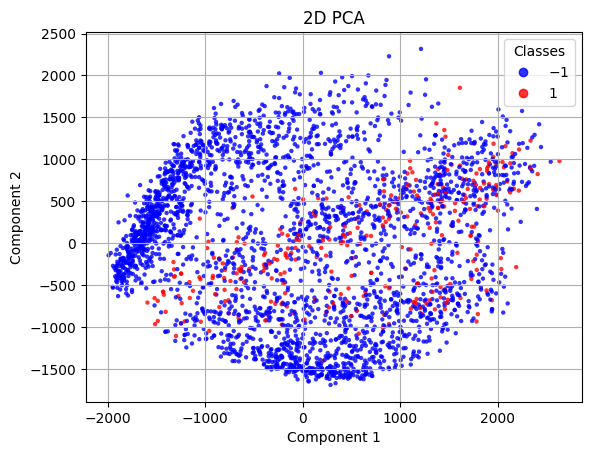

In [94]:
from sklearn.decomposition import PCA

num_components = 2

pca = PCA(n_components=num_components)
pca.fit(Xtrain)
projected = pca.transform(Xtrain)

fig, ax = plt.subplots()
scatter = ax.scatter(
    projected[:, 0],
    projected[:, 1],
    c=Ytrain,
    cmap="bwr",
    edgecolor="none",
    alpha=0.8,
    s=10,
)
ax.set_title("2D PCA")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.grid(True)
ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()